In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [35]:
dataset = pd.read_csv("mouse_viral_study.csv")
dataset

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [36]:
X = dataset[['Med_1_mL', 'Med_2_mL']].values
y = dataset[['Virus Present']].values

In [37]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


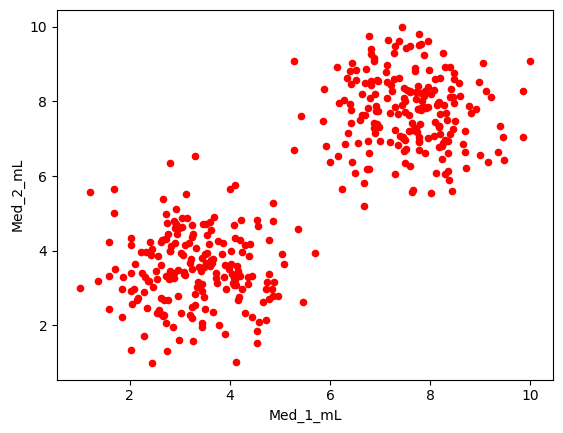

In [54]:
dataset.plot.scatter(x='Med_1_mL',y="Med_2_mL", c="red",colormap='winter')
plt.show()

In [39]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)


# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [40]:
W,b=initialisation(x_train)
modele(X, W, b)
x_train.shape
y_train.shape

(320, 1)

In [41]:
def log_loss(y, A):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


def gradients(X, A, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)


def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [42]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
    # Initialisation
    W, b = initialisation(X)
    loss_history = []
    # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W, b

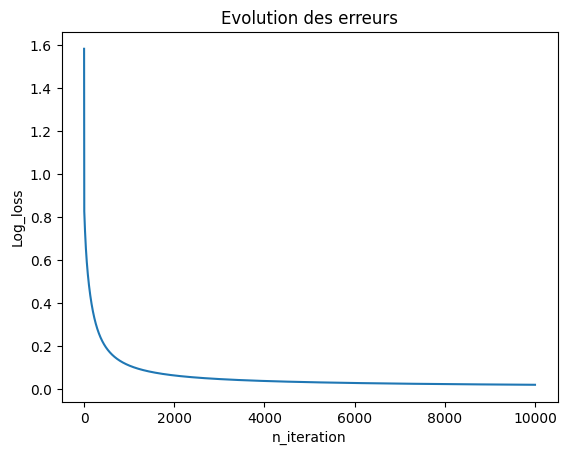

In [56]:
W,b=regression_logistique(x_train, y_train)

In [55]:
from sklearn.metrics import accuracy_score
y_pred = predict(x_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))

[[9.95606921e-01]
 [9.99812375e-01]
 [6.96285829e-03]
 [9.98042812e-01]
 [1.17654849e-04]
 [1.34981701e-03]
 [9.75836229e-01]
 [9.97534852e-01]
 [1.15553151e-02]
 [5.63145898e-02]
 [9.70422599e-01]
 [4.79461758e-03]
 [8.22603523e-01]
 [9.95928290e-01]
 [9.88659951e-01]
 [9.96130538e-01]
 [9.89278073e-01]
 [1.26135598e-02]
 [1.69647261e-02]
 [1.70891996e-02]
 [3.24379051e-03]
 [9.52866718e-01]
 [9.81803371e-01]
 [7.29467884e-04]
 [9.82856502e-01]
 [3.93779460e-04]
 [9.97776623e-01]
 [8.13135378e-04]
 [9.91811280e-01]
 [9.93672810e-01]
 [5.97001035e-03]
 [2.68314995e-04]
 [9.99905870e-01]
 [9.98699148e-01]
 [9.80104169e-01]
 [9.94621247e-01]
 [9.91736232e-01]
 [6.75578245e-04]
 [9.26243222e-03]
 [5.79327979e-04]
 [9.99640688e-01]
 [6.67754473e-04]
 [2.59478122e-03]
 [9.88146836e-01]
 [9.98851787e-01]
 [9.51959139e-03]
 [9.25999554e-03]
 [9.98448642e-01]
 [2.06772200e-02]
 [9.78881639e-01]
 [3.64858169e-03]
 [9.93899438e-01]
 [9.95955793e-01]
 [1.87819529e-03]
 [9.94943389e-01]
 [2.297631

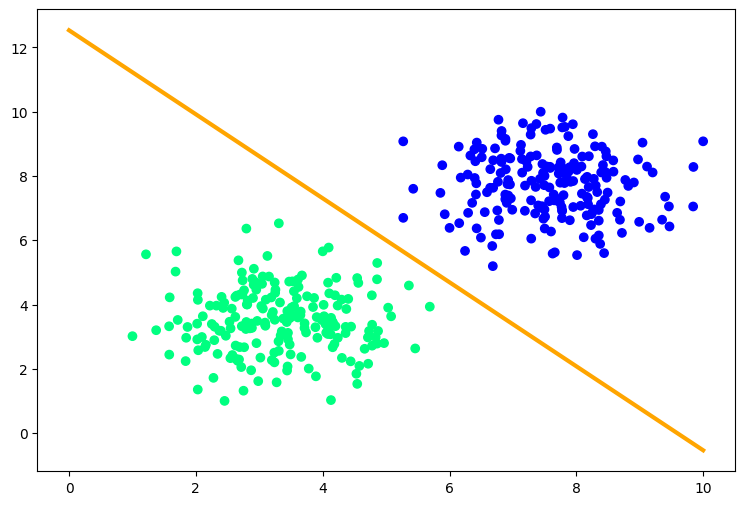

In [57]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 10, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)